# Fall 2022 Update: This was an OG file to graph netCDF files: specifically getting familiar with the SIC netCDF data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore')

import netCDF4
from netCDF4 import Dataset



In [2]:
#filename = '/d6/bxw2101/seaice_conc_monthly/seaice_conc_monthly_sh_200708_f13_v04r00.nc'
#filename = '/d6/bxw2101/seaice_conc_monthly/seaice_conc_monthly_sh_201708_f17_v04r00.nc'
filename = '/d6/bxw2101/seaice_conc_monthly/seaice_conc_monthly_sh_201711_f17_v04r00.nc'
fh = Dataset(filename, mode='r')

In [16]:
# File from the most recent 6 months (2022)
filename = '/d6/bxw2101/recent_seaice_conc_monthly/seaice_conc_monthly_icdr_sh_202202_f18_v02r00.nc'
fh = Dataset(filename, mode='r')

There are three diff algorithm values we can plot. ranging from varkeys[0] to [2]

In [3]:
x = fh.variables['xgrid'][:]
y = fh.variables['ygrid'][:]
#grid of x: 316, y: 332.
#x: [-3950000.  3950000.] actual values: -3937500 to 3950000.
#y: [-3950000.  4350000.] actual values: 4337500 to -3937500.
time = fh.variables['time'][:]
date_1 = datetime.datetime.strptime("01/01/1601", "%m/%d/%Y")
end_date = date_1 + datetime.timedelta(days=int(time))

In [23]:
#print(x)
#print(y)

Variable: cdr_seaice_conc_monthly
Full name: NOAA/NSIDC Climate Data Record of Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration

Variable: nsidc_bt_seaice_conc_monthly
Full name: Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration by Bootstrap algorithm processed by NSIDC

Variable: nsidc_nt_seaice_conc_monthly
Full name: Passive Microwave Monthly Southern Hemisphere Sea Ice Concentration by NASA Team algorithm processed by NSIDC



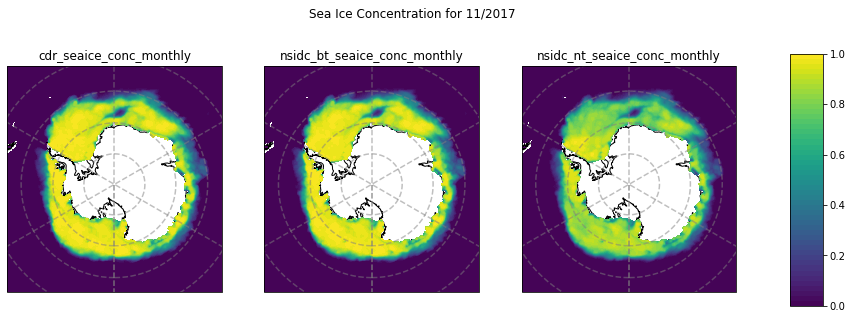

In [8]:
sp = ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(15, 5))
fig.suptitle("Sea Ice Concentration for "+ str(end_date.strftime('%m')) + '/' + str(end_date.year));
varkeys = list(fh.variables.keys())
for i in range(3):
    varname = varkeys[i]
    sic_var = fh.variables[varname]
    full_name = sic_var.long_name
    sic = sic_var[0,:,:]
    ax = plt.subplot(1, 3, i + 1, projection=sp)
    ax.coastlines()
    im = ax.contourf(x, y, sic, 50, vmin=0, vmax=1) #50 contour levels.
    gl = ax.gridlines(
        linewidth=1.5, color='gray', alpha=0.5, linestyle='--'
        #draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
    )
    #Hallelujah, with the updated cartopy, grid lines work!!
    ax.set_title(varname);
    print('Variable: ' + varname + '\nFull name: ' + full_name + '\n')

    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar = fig.colorbar(im, cax = cbar_ax)
cbar.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()